<h1> Customer Segmentation Using Clustering – Credit Card User Behavior Analysis </h1>

<p>A leading credit card company wants to understand the different types of customers it serves  based on their usage behavior, activity level, and financial metrics.<br>
The goal is to group customers into meaningful segments that can help the company:
<br>
Identify high-value customers
<br>
Detect low-engagement or churn-risk users
<br>
Customize marketing and service strategies per segment</p>

<h3> What Will This Project Solve? </h3>
Through clustering, this project will help answer:

--> What types of customers does the bank serve?

--> Who are the big spenders?

--> Who are the dormant or inactive users?

--> Are there any high-risk customers with high utilization?

--> How can the bank strategically target each segment?

<h3> These insights will enable data-driven decisions for:</h3>

Product personalization

Retention campaigns

Credit limit strategies

Marketing prioritization

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
data=pd.read_csv('BankChurners.csv')
data.head(11)
data.tail()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,...,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462,0.000191,0.999810
10123,710638233,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,...,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511,0.995270,0.004729
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,...,5409.0,0,5409.0,0.819,10291,60,0.818,0.000,0.997880,0.002118
10125,717406983,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,...,5281.0,0,5281.0,0.535,8395,62,0.722,0.000,0.996710,0.003294
10126,714337233,Attrited Customer,43,F,2,Graduate,Married,Less than $40K,Silver,25,...,10388.0,1961,8427.0,0.703,10294,61,0.649,0.189,0.996620,0.003377


In [4]:
data.shape

(10127, 23)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 23 columns):
 #   Column                                                                                                                              Non-Null Count  Dtype  
---  ------                                                                                                                              --------------  -----  
 0   CLIENTNUM                                                                                                                           10127 non-null  int64  
 1   Attrition_Flag                                                                                                                      10127 non-null  object 
 2   Customer_Age                                                                                                                        10127 non-null  int64  
 3   Gender                                                                           

In [6]:
data.isna().sum()

CLIENTNUM                                                                                                                             0
Attrition_Flag                                                                                                                        0
Customer_Age                                                                                                                          0
Gender                                                                                                                                0
Dependent_count                                                                                                                       0
Education_Level                                                                                                                       0
Marital_Status                                                                                                                        0
Income_Category                                 

In [7]:
data.columns

Index(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'],
      dtype='object')

In [8]:
df=data.drop(columns=['CLIENTNUM','Attrition_Flag','Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'], inplace=True)

In [9]:
data.columns

Index(['Customer_Age', 'Gender', 'Dependent_count', 'Education_Level',
       'Marital_Status', 'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'],
      dtype='object')

In [10]:
data.describe()

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894
std,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691
min,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000
25%,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000
50%,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000
75%,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000
max,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000


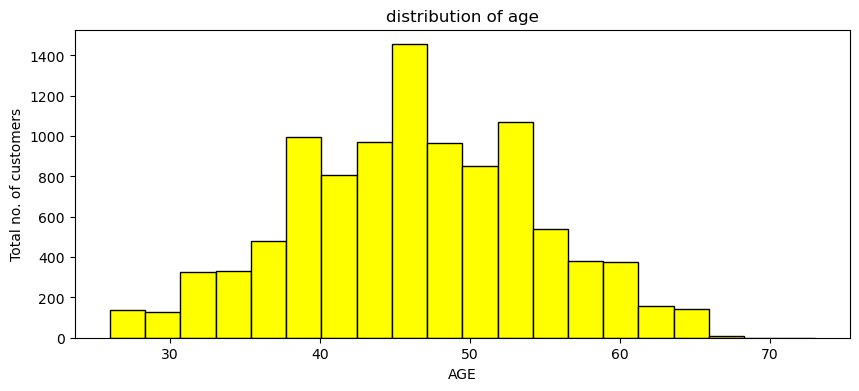

In [11]:
plt.figure(figsize=(10,4))
plt.hist(data['Customer_Age'],bins=20,color='yellow',edgecolor='black')
plt.title('distribution of age')
plt.xlabel('AGE')
plt.ylabel('Total no. of customers')
plt.show()

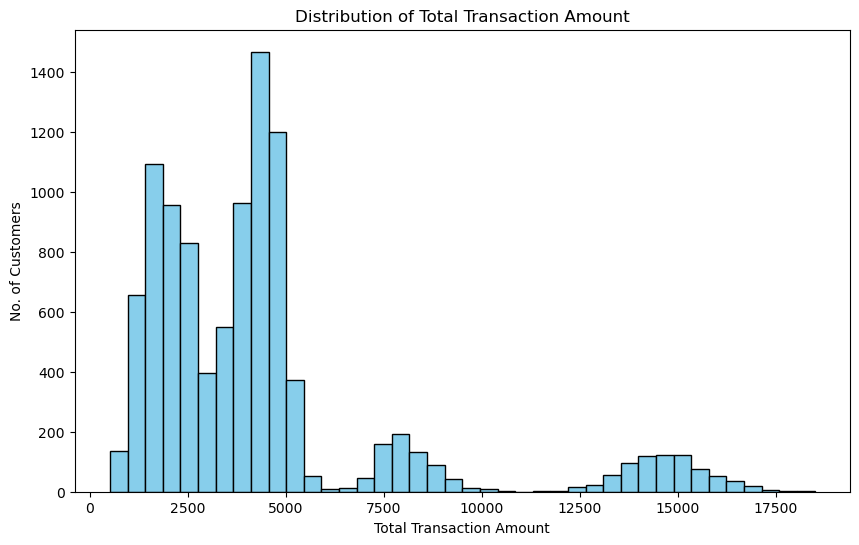

In [12]:
plt.figure(figsize=(10,6))
plt.hist(x=data['Total_Trans_Amt'],bins=40,color='skyblue',edgecolor='black')
plt.ylabel('No. of Customers')
plt.xlabel('Total Transaction Amount')
plt.title('Distribution of Total Transaction Amount')
plt.show()

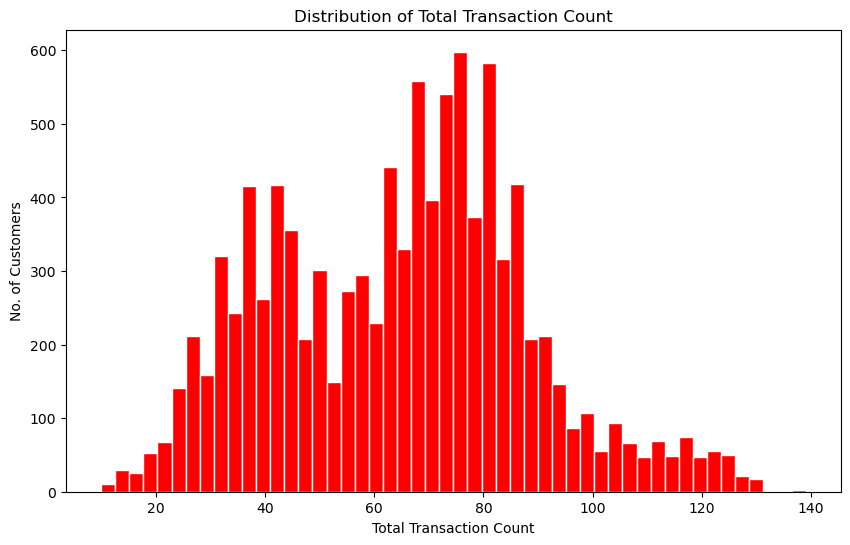

In [13]:
plt.figure(figsize=(10,6))
plt.hist(x=data['Total_Trans_Ct'],bins=50,color='red',edgecolor='white')
plt.ylabel('No. of Customers')
plt.xlabel('Total Transaction Count')
plt.title('Distribution of Total Transaction Count')
plt.show()

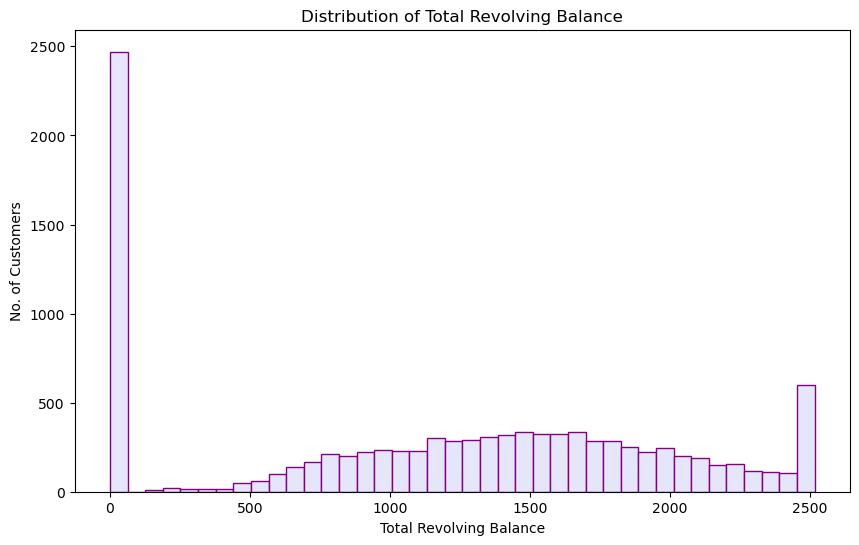

In [14]:
plt.figure(figsize=(10,6))
plt.hist(x=data['Total_Revolving_Bal'],bins=40,color='lavender',edgecolor='purple')
plt.ylabel('No. of Customers')
plt.xlabel('Total Revolving Balance')
plt.title('Distribution of Total Revolving Balance')
plt.show()

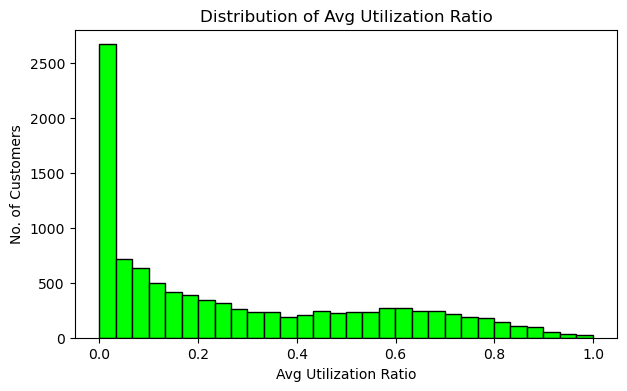

In [15]:
plt.figure(figsize=(7,4))
plt.hist(data['Avg_Utilization_Ratio'], bins=30, color='lime', edgecolor='black')
plt.title('Distribution of Avg Utilization Ratio')
plt.xlabel('Avg Utilization Ratio')
plt.ylabel('No. of Customers')
plt.show()

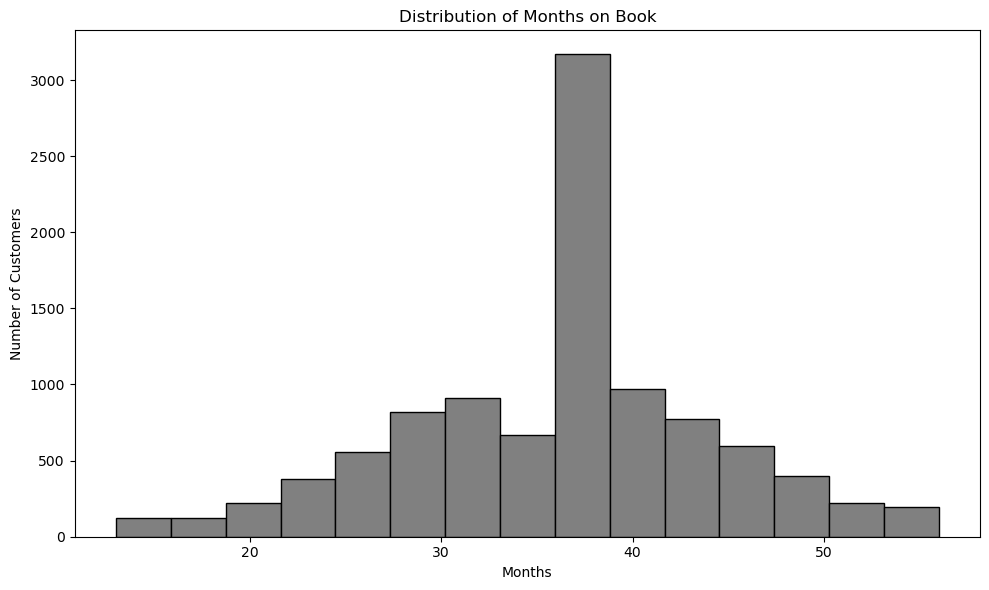

In [16]:
plt.figure(figsize=(10,6))
plt.hist(data['Months_on_book'], bins=15, color='grey', edgecolor='black')
plt.title('Distribution of Months on Book')
plt.xlabel('Months')
plt.ylabel('Number of Customers')
plt.tight_layout()
plt.show()


In [17]:
# plt.figure(figsize=(6,3))
# plt.hist(data['Total_Relationship_Count'], bins=10, color='blue', edgecolor='white')
# plt.title('Distribution of Total Relationship Count')
# plt.xlabel('Total Relationship Count')
# plt.ylabel('Number of Customers')
# plt.show()

In [18]:
df=data.copy()

In [19]:
data_encoded = pd.get_dummies(data, drop_first=True)

In [20]:
data.dtypes[data.dtypes == 'object']

Gender             object
Education_Level    object
Marital_Status     object
Income_Category    object
Card_Category      object
dtype: object

In [21]:
data= pd.get_dummies(data, columns=['Gender', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category'], drop_first=True)

In [22]:
data.dtypes[data.dtypes == 'object']

Series([], dtype: object)

In [23]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_features = scaler.fit_transform(data)

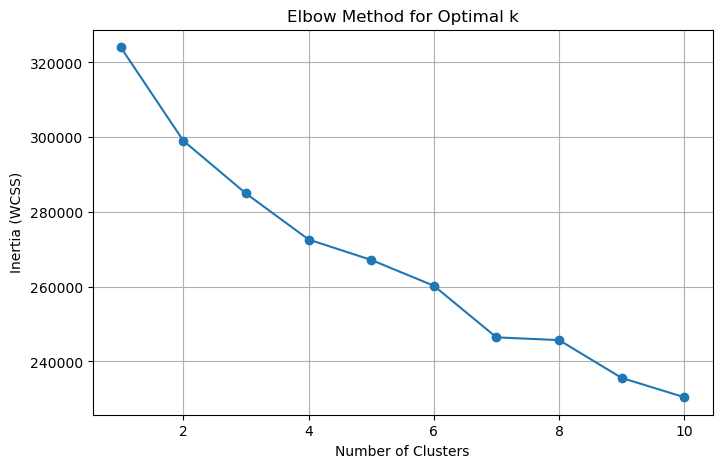

In [24]:
from sklearn.cluster import KMeans
inertia = []
for d in range(1, 11):
    kmeans = KMeans(n_clusters=d, random_state=42)
    clusters=kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)
    data['Cluster'] = clusters

plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia (WCSS)')
plt.grid(True)
plt.show()

In [25]:
kmeans = KMeans(n_clusters=4, random_state=42)
data['Cluster'] = kmeans.fit_predict(scaled_features)
data.head(100)

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,...,Marital_Status_Unknown,Income_Category_$40K - $60K,Income_Category_$60K - $80K,Income_Category_$80K - $120K,Income_Category_Less than $40K,Income_Category_Unknown,Card_Category_Gold,Card_Category_Platinum,Card_Category_Silver,Cluster
0,45,3,39,5,1,3,12691.0,777,11914.0,1.335,...,False,False,True,False,False,False,False,False,False,2
1,49,5,44,6,1,2,8256.0,864,7392.0,1.541,...,False,False,False,False,True,False,False,False,False,0
2,51,3,36,4,1,0,3418.0,0,3418.0,2.594,...,False,False,False,True,False,False,False,False,False,2
3,40,4,34,3,4,1,3313.0,2517,796.0,1.405,...,True,False,False,False,True,False,False,False,False,0
4,40,3,21,5,1,0,4716.0,0,4716.0,2.175,...,False,False,True,False,False,False,False,False,False,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,64,1,52,6,4,3,1709.0,895,814.0,1.656,...,False,False,False,False,True,False,False,False,False,0
96,45,3,35,5,4,2,3454.0,1200,2254.0,0.597,...,False,True,False,False,False,False,False,False,False,3
97,53,3,35,5,3,2,3789.0,1706,2083.0,1.047,...,False,True,False,False,False,False,False,False,False,3
98,56,3,50,3,2,0,9689.0,2250,7439.0,0.576,...,False,False,False,False,False,False,False,False,False,2


In [26]:
cluster_analysis=data.groupby('Cluster').mean()
cluster_analysis

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,...,Marital_Status_Single,Marital_Status_Unknown,Income_Category_$40K - $60K,Income_Category_$60K - $80K,Income_Category_$80K - $120K,Income_Category_Less than $40K,Income_Category_Unknown,Card_Category_Gold,Card_Category_Platinum,Card_Category_Silver
Cluster,,,,,,,,,,,,,,,,,,,,,
0,46.352771,2.265589,35.904446,3.851617,2.365185,2.418014,3479.852916,1147.559758,2332.293158,0.752255,...,0.398961,0.069861,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.017610
1,46.219955,2.541950,35.991686,3.304611,2.317460,2.467876,27766.888889,1182.023432,26584.865457,0.761537,...,0.442933,0.090703,0.085412,0.120181,0.384732,0.073318,0.078609,0.086924,0.015117,0.371126
2,46.443691,2.420716,35.987571,3.980038,2.323917,2.488889,8852.424407,1188.232768,7664.191638,0.768547,...,0.351789,0.072316,0.000000,0.468173,0.386441,0.000000,0.000000,0.000377,0.000000,0.000377
3,46.227188,2.280074,35.869646,3.846927,2.338920,2.464060,5632.329162,1147.894227,4484.434935,0.760560,...,0.387709,0.072626,0.624581,0.000000,0.000000,0.000000,0.375419,0.000000,0.000000,0.000745


In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_components = pca.fit_transform(scaled_features)

data['PC1'] = pca_components[:, 0]
data['PC2'] = pca_components[:, 1]

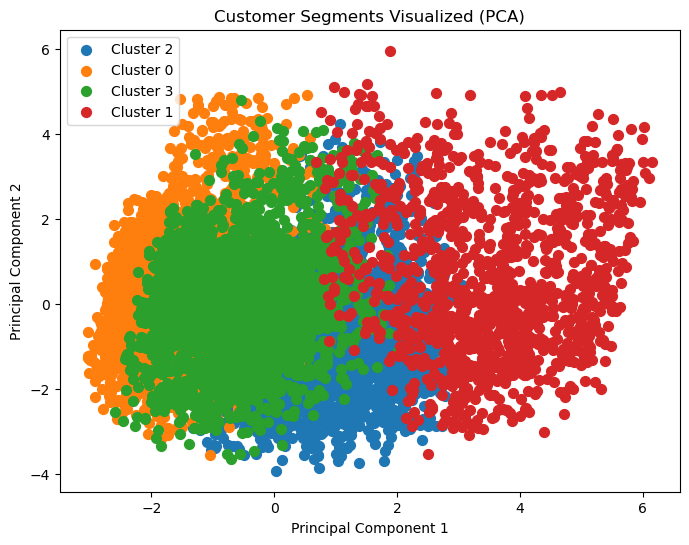

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=4)
principal_components = pca.fit_transform(scaled_features)

pca_data = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2', 'PC3', 'PC4'])
pca_data['Cluster'] = data['Cluster']

plt.figure(figsize=(8,6))
for cluster in pca_data['Cluster'].unique():
    cluster_data = pca_data[pca_data['Cluster'] == cluster]
    plt.scatter(cluster_data['PC1'], cluster_data['PC2'], label=f'Cluster {cluster}', s=50)

plt.title('Customer Segments Visualized (PCA)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()


In [ ]:
clusters = kmeans.predict(scaled_features)

data['Cluster'] = clusters         # For numerical analysis (dummy columns)
df['Cluster'] = clusters           # For readable analysis (original columns)

print(data.groupby('Cluster')[[
    'Card_Category_Gold',
    'Card_Category_Silver',
    'Card_Category_Platinum'
]].mean())

print(df.groupby('Cluster')['Card_Category'].value_counts())
print(df.groupby('Cluster')['Income_Category'].value_counts())

df['PC1'] = principal_components[:, 0]
df['PC2'] = principal_components[:, 1]
df['PC3'] = principal_components[:, 2]
df['PC4'] = principal_components[:, 3]

df.to_csv('Customer_Segments.csv', index=False)
print("Clustered dataset with original features + PCA saved as 'Customer_Segments.csv'")


         Card_Category_Gold  Card_Category_Silver  Card_Category_Platinum
Cluster                                                                  
0                  0.000000              0.017610                0.000000
1                  0.086924              0.371126                0.015117
2                  0.000377              0.000377                0.000000
3                  0.000000              0.000745                0.000000
Cluster  Card_Category
0        Blue             3403
         Silver             61
1        Blue              697
         Silver            491
         Gold              115
         Platinum           20
2        Blue             2653
         Gold                1
         Silver              1
3        Blue             2683
         Silver              2
Name: count, dtype: int64
Cluster  Income_Category
0        Less than $40K     3464
1        $80K - $120K        509
         $120K +             341
         $60K - $80K         159
         

🌀 Cluster 0
Size: Largest group (~3.4k)

Income: Mostly < $40K

Card Type: 99% use Blue, a few Silver

Profile: Budget-conscious, likely low spenders, may prefer basic offers

🌀 Cluster 1
Size: Medium (~1.3k)

Income: Diverse — high number in $80K+

Card Type: More variety — Blue, Silver, Gold, even Platinum

Profile: High-value customers, loyal, likely more engagement — target for premium upgrades

🌀 Cluster 2
Size: Medium (~2.6k)

Income: Mostly $60K–$120K

Card Type: Almost all Blue

Profile: Middle-income working professionals; offer credit line increase or rewards

🌀 Cluster 3
Size: ~2.6k

Income: Mostly $40K–$60K and many Unknown

Card Type: Almost all Blue, just 2 Silver

Profile: Could be newer users or inactive, worth targeting for reactivation campaigns